In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#导入爬虫结果
book=pd.read_table('book.txt')

In [3]:
book.shape

(498, 1)

In [4]:
book.head()

,排名，图片，书名，评论数，推荐度，作者，出版时间，出版社，五星评分次数，价格，原价
0,"{""排名"": ""1"", ""图片"": ""http://img3m5.ddimg.cn/3/20..."
1,"{""排名"": ""2"", ""图片"": ""http://img3m7.ddimg.cn/37/2..."
2,"{""排名"": ""3"", ""图片"": ""http://img3m5.ddimg.cn/51/3..."
3,"{""排名"": ""4"", ""图片"": ""http://img3m7.ddimg.cn/85/3..."
4,"{""排名"": ""5"", ""图片"": ""http://img3m0.ddimg.cn/22/1..."


# 处理爬虫数据，制作DataFrame

In [5]:
book.columns=['原文件']

In [6]:
#分离出“排名”数据
book['排名']=book['原文件']
for i in range(498):
    pm=book['原文件'][i].split('排名": "')[1].split('", "图片')
    book['排名'][i]=pm[0]

In [7]:
#分离出“书名”数据
book['书名']=book['原文件']
for i in range(498):
    sm=book['原文件'][i].split('书名": "')[1].split('", "评论数')
    book['书名'][i]=sm[0]

In [8]:
#分离出“评论数”数据
book['评论数']=book['原文件']
for i in range(498):
    pls=book['原文件'][i].split('评论数": "')[1].split('条评论')
    book['评论数'][i]=pls[0]

In [9]:
#分离出“推荐度”数据
book['推荐度']=book['原文件']
for i in range(498):
    tjd=book['原文件'][i].split('推荐度": "')[1].split('%推荐')
    book['推荐度'][i]=tjd[0]

In [10]:
#分离出“作者”数据
book['作者']=book['原文件']
for i in range(498):
    zz=book['原文件'][i].split('作者": "')[1].split('", "出版时间')
    book['作者'][i]=zz[0]

In [11]:
#分离出“出版时间”数据
book['出版时间']=book['原文件']
for i in range(498):
    cbsj=book['原文件'][i].split('出版时间": "')[1].split('", "出版社')
    book['出版时间'][i]=cbsj[0]

In [12]:
#分离出“出版社”数据
book['出版社']=book['原文件']
for i in range(498):
    cbs=book['原文件'][i].split('出版社": "')[1].split('", "五星评')
    book['出版社'][i]=cbs[0]

In [13]:
#分离出“五星评分次数”数据
book['五星评分次数']=book['原文件']
for i in range(498):
    wxpf=book['原文件'][i].split('五星评分次数": "')[1].split('次", "价')
    book['五星评分次数'][i]=wxpf[0]

In [14]:
#分离出“价格”数据
book['价格']=book['原文件']
for i in range(498):
    jg=book['原文件'][i].split('价格": "')[1].split('", "原价')
    book['价格'][i]=jg[0]

In [15]:
#分离出“原价”数据
book['原价']=book['原文件']
for i in range(498):
    yj=book['原文件'][i].split('原价": "')[1].split('"}')
    book['原价'][i]=yj[0]

In [16]:
book.head()

,原文件,排名,书名,评论数,推荐度,作者,出版时间,出版社,五星评分次数,价格,原价
0,"{""排名"": ""1"", ""图片"": ""http://img3m5.ddimg.cn/3/20...",1,摆渡人3无境之爱（千万畅销心灵治愈小说“摆渡人”系列完结篇，令无数读者灵魂震颤的人性救赎之作！）,17884,100,克莱儿・麦克福尔,2019-04-01,百花洲文艺出版社,10636,31.70,46.00
1,"{""排名"": ""2"", ""图片"": ""http://img3m7.ddimg.cn/37/2...",2,精进2：解锁万物的心智进化法（采铜新作！）,8128,100,采铜,2019-06-01,江苏凤凰文艺出版社,7720,26.40,52.80
2,"{""排名"": ""3"", ""图片"": ""http://img3m5.ddimg.cn/51/3...",3,人生海海（莫言盛赞！董卿、高晓松反复阅读，杨洋、李健倾力推荐！2019麦家新作）,56309,100,麦家,2019-04-16,北京十月文艺出版社,10822,55.00,55.00
3,"{""排名"": ""4"", ""图片"": ""http://img3m7.ddimg.cn/85/3...",4,成瘾：如何设计让人上瘾的产品、品牌和观念,34008,99.9,程志良,2017-08-30,机械工业出版社,12697,32.70,49.00
4,"{""排名"": ""5"", ""图片"": ""http://img3m0.ddimg.cn/22/1...",5,白色橄榄树（全二册）（当当专享签名本&阿瓒同款限量红绳随机发货！ 人气作家玖月��继《少年的...,7607,100,玖月��,2019-04-01,百花洲文艺出版社,4736,34.90,69.80


In [17]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
原文件       498 non-null object
排名        498 non-null object
书名        498 non-null object
评论数       498 non-null object
推荐度       498 non-null object
作者        498 non-null object
出版时间      498 non-null object
出版社       498 non-null object
五星评分次数    498 non-null object
价格        498 non-null object
原价        498 non-null object
dtypes: object(11)
memory usage: 42.9+ KB


In [18]:
book.to_excel('book.xlsx')
#将最终结果导出到excel文件
#由于部分作者使用笔名，姓名形式复杂，无法根据姓名判断作者国别，所以在excel文件中手动添加

# 从表中提取有用信息

In [94]:
#导入添加了“作者国别”的excel文件
book=pd.read_excel(r'C:\Users\m\Desktop\books(1).xlsx')

In [95]:
book.drop(['原文件','作者'],axis=1,inplace=True)

In [96]:
book.shape

(498, 10)

In [97]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 497
Data columns (total 10 columns):
排名        498 non-null int64
书名        498 non-null object
评论数       498 non-null int64
推荐度       498 non-null float64
作者国别      498 non-null int64
出版时间      498 non-null object
出版社       496 non-null object
五星评分次数    498 non-null int64
价格        498 non-null float64
原价        498 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 42.8+ KB


In [23]:
from datetime import date

In [24]:
#由出版时间计算出版至今的天数
book['出版时长']=book['出版时间']
for i in range(498):
    delta=date.today()-date(int(book['出版时间'][i][0:4]),int(book['出版时间'][i][5:7]),int(book['出版时间'][i][8::]))
    book['出版时长'][i]=delta.days

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [25]:
for i in range(498):
    book['书名'][i]=book['书名'][i]+'[]'

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
#从原“书名”列中提取括号里的备注内容
book['备注']=book['书名']
for i in range(498):
    bz=book['书名'][i].split('[')[1].split(']')
    book['备注'][i]=bz[0]

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
#从原“书名”列中提取真正的书名
for i in range(498):
    sm=book['书名'][i].split('[')
    book['书名'][i]=sm[0]

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#添加变量“推荐”，代表此书是否有名人推荐，若“备注”中含有字符串“推荐”，则为1，否则为0
book['推荐']=book['书名']
for i in range(498):
    if '推荐' in book['备注'][i]:
        book['推荐'][i]=1
    else:
        book['推荐'][i]=0

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
#添加变量“得奖”，代表此书是否获过奖，若“备注”中含有字符串“奖”，则为1，否则为0
book['得奖']=book['书名']
for i in range(498):
    if '奖' in book['备注'][i]:
        book['得奖'][i]=1
    else:
        book['得奖'][i]=0

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
#添加变量“系列”，代表此书是否为系列套书，若“备注”中含有字符串“全x册”、“套装”、“系列”、“部曲”，则为1，否则为0
book['系列']=book['书名']
for i in range(498):
    if '全' in book['备注'][i] and '册' in book['备注'][i] or '套装' in book['备注'][i] or '系列' in book['备注'][i]  or '部曲' in book['备注'][i]:
        book['系列'][i]=1
    else:
        book['系列'][i]=0

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
#检查“书名”中有“系列”信息的情况
for i in range(498):
    if '全' in book['书名'][i] and '册' in book['书名'][i] or '套装' in book['书名'][i] or '系列' in book['书名'][i] or '部曲' in book['书名'][i]:
        book['系列'][i]=1

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
#添加变量“赠品”，代表此书是否有配套赠品，若“备注”中含有字符串“赠”、“送”，则为1，否则为0
book['赠品']=book['书名']
for i in range(498):
    if '赠' in book['备注'][i] or '送' in book['备注'][i]:
        book['赠品'][i]=1
    else:
        book['赠品'][i]=0

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
#去除数值型的千位分隔符
book['原价']=book['原价'].replace('1,080.00','1080.00')

In [34]:
#由“原价”和“价格”数据计算此书折扣
book['折扣']=book['价格']
for i in range(498):
    book['折扣'][i]=round((book['价格'][i]/float(book['原价'][i]))*10,2)

C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
#删除无用信息
book.drop(['原价','出版社','出版时间','备注'],axis=1,inplace=True)

In [36]:
book.head()

,排名,书名,评论数,推荐度,作者国别,五星评分次数,价格,出版时长,推荐,得奖,系列,赠品,折扣
0,1,摆渡人3无境之爱,17884,100.0,0,10636,31.7,77,0,0,1,0,6.89
1,2,精进2：解锁万物的心智进化法,8128,100.0,1,7720,26.4,16,0,0,0,0,5.00
2,3,人生海海,56309,100.0,1,10822,55.0,62,1,0,0,0,10.00
3,4,成瘾：如何设计让人上瘾的产品、品牌和观念,34008,99.9,1,12697,32.7,656,0,0,0,0,6.67
4,5,白色橄榄树(全二册),7607,100.0,1,4736,34.9,77,0,0,1,0,5.00


In [37]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 497
Data columns (total 13 columns):
排名        498 non-null int64
书名        498 non-null object
评论数       498 non-null int64
推荐度       498 non-null float64
作者国别      498 non-null int64
五星评分次数    498 non-null int64
价格        498 non-null float64
出版时长      498 non-null object
推荐        498 non-null object
得奖        498 non-null object
系列        498 non-null object
赠品        498 non-null object
折扣        498 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 74.5+ KB


# 数据描述性统计

### 数值型变量描述统计

In [38]:
num_x=['评论数','推荐度','五星评分次数','价格','出版时长','折扣']

In [39]:
book[num_x].head()

,评论数,推荐度,五星评分次数,价格,出版时长,折扣
0,17884,100.0,10636,31.7,77,6.89
1,8128,100.0,7720,26.4,16,5.00
2,56309,100.0,10822,55.0,62,10.00
3,34008,99.9,12697,32.7,656,6.67
4,7607,100.0,4736,34.9,77,5.00


In [40]:
book[num_x].describe()

,评论数,推荐度,五星评分次数,价格,折扣
count,4.980000e+02,498.000000,498.000000,498.000000,498.000000
mean,1.443288e+05,99.916867,3602.363454,46.246586,5.690301
std,2.810571e+05,0.207011,7695.441752,59.672477,1.202738
min,9.100000e+01,97.700000,91.000000,7.500000,1.900000
25%,5.680000e+02,99.900000,308.000000,19.900000,5.000000
50%,2.481650e+04,100.000000,1227.000000,28.950000,5.000000
75%,1.735348e+05,100.000000,3416.000000,48.525000,6.680000
max,2.406789e+06,100.000000,87598.000000,609.900000,10.000000


In [42]:
#数值型变量之间的相关系数
book[num_x].corr() 

,评论数,推荐度,五星评分次数,价格,折扣
评论数,1.000000,0.058146,0.400958,-0.043966,0.116157
推荐度,0.058146,1.000000,0.074461,-0.078200,-0.014898
五星评分次数,0.400958,0.074461,1.000000,0.010928,0.080233
价格,-0.043966,-0.078200,0.010928,1.000000,0.027549
折扣,0.116157,-0.014898,0.080233,0.027549,1.000000


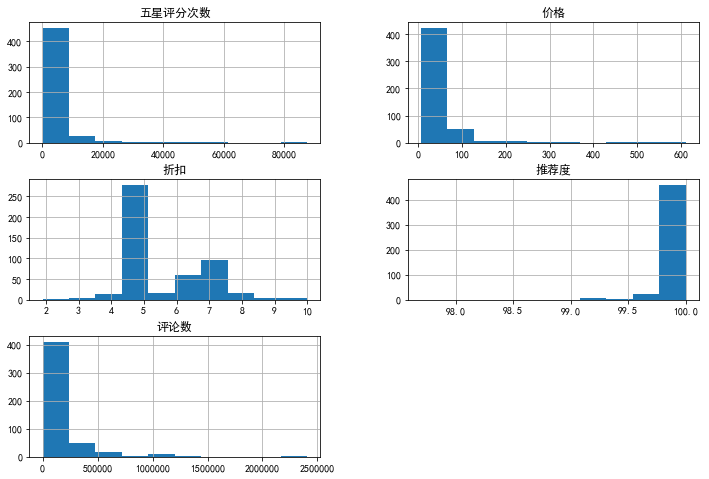

In [43]:
#数值型变量频数分布直方图
book[num_x].hist(figsize=(12,8));

In [44]:
#数值数据离散化
book['五星评分次数区间']=pd.cut(book['五星评分次数'],[0,5000,10000,15000,20000,30000,200000],labels=['<5000','5000-10000','10000-15000','15000-20000','20000-30000','>30000'])
book['价格区间']=pd.cut(book['价格'],[0.00,50.00,100.00,150.00,200.00,300.00,800.00],labels=['<50','50-100','100-150','150-200','200-300','>300'])
book['评论数区间']=pd.cut(book['评论数'],[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,300000],labels=['<10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000','>100000'])
book['出版时长区间']=pd.cut(book['出版时长'],[0,50,100,200,300,400,500,600,700,800,900,1000,12000],labels=['<50','50-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000','>1000'])

In [45]:
t_fre = book.pivot_table(index='出版时长区间',values='排名',aggfunc=(len),margins=True)
t_fre['比例']=np.round(t_fre / 498.00 *100,2)
t_fre

,排名,比例
出版时长区间,,
<50,106,21.29
50-100,84,16.87
100-200,46,9.24
200-300,27,5.42
300-400,19,3.82
400-500,25,5.02
500-600,12,2.41
600-700,20,4.02
700-800,16,3.21


In [46]:
w_fre = book.pivot_table(index='价格区间',values='排名',aggfunc=(len),margins=True)
w_fre['比例']=np.round(w_fre / 498.00 *100,2)
w_fre

,排名,比例
价格区间,,
<50,392,78.71
50-100,71,14.26
100-150,14,2.81
150-200,7,1.41
200-300,8,1.61
>300,6,1.20
All,498,100.00


In [47]:
w_fre = book.pivot_table(index='五星评分次数区间',values='排名',aggfunc=(len),margins=True)
w_fre['比例']=np.round(w_fre / 498.00 *100,2)
w_fre

,排名,比例
五星评分次数区间,,
<5000,412,82.73
5000-10000,47,9.44
10000-15000,17,3.41
15000-20000,8,1.61
20000-30000,5,1.00
>30000,9,1.81
All,498,100.00


In [48]:
w_fre = book.pivot_table(index='评论数区间',values='排名',aggfunc=(len),margins=True)
w_fre['比例']=np.round(w_fre / 498.00 *100,2)
w_fre

,排名,比例
评论数区间,,
<10000,221,44.38
10000-20000,21,4.22
20000-30000,17,3.41
30000-40000,12,2.41
40000-50000,9,1.81
50000-60000,9,1.81
60000-70000,9,1.81
70000-80000,9,1.81
80000-90000,11,2.21


In [49]:
w_fre = book.pivot_table(index='推荐度',values='排名',aggfunc=(len),margins=True)
w_fre['比例']=np.round(w_fre / 498.00 *100,2)
w_fre

,排名,比例
推荐度,,
97.7,1,0.20
98.1,1,0.20
98.7,1,0.20
98.9,1,0.20
99.1,5,1.00
99.2,3,0.60
99.3,1,0.20
99.4,2,0.40
99.5,3,0.60


### 类别型变量描述性统计

In [50]:
c_fre = book.pivot_table(index='作者国别',values='排名',aggfunc=(len),margins=True)
c_fre['比例']=np.round(c_fre / 498.00 *100,2)
c_fre

,排名,比例
作者国别,,
0,222,44.58
1,276,55.42
All,498,100.00


In [51]:
m_fre = book.pivot_table(index='推荐',values='排名',aggfunc=(len),margins=True)
m_fre['比例']=np.round(m_fre / 498.00 *100,2)
m_fre

,排名,比例
推荐,,
0,458,91.97
1,40,8.03
All,498,100.00


In [52]:
m_fre = book.pivot_table(index='得奖',values='排名',aggfunc=(len),margins=True)
m_fre['比例']=np.round(m_fre / 498.00 *100,2)
m_fre

,排名,比例
得奖,,
0,480,96.39
1,18,3.61
All,498,100.00


In [53]:
m_fre = book.pivot_table(index='系列',values='排名',aggfunc=(len),margins=True)
m_fre['比例']=np.round(m_fre / 498.00 *100,2)
m_fre

,排名,比例
系列,,
0,389,78.11
1,109,21.89
All,498,100.00


In [54]:
m_fre = book.pivot_table(index='赠品',values='排名',aggfunc=(len),margins=True)
m_fre['比例']=np.round(m_fre / 498.00 *100,2)
m_fre

,排名,比例
赠品,,
0,478,95.98
1,20,4.02
All,498,100.00


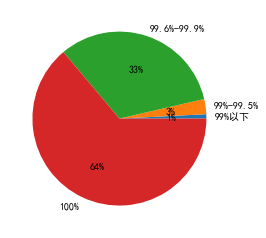

In [55]:
#类别型变量饼状图
if __name__ == '__main__':
    labels='99%以下','99%-99.5%','99.6%-99.9%','100%'
    fracs=[4,14,162,318]
    plt.pie(x=fracs,labels=labels,autopct='%.0f%%')
    plt.show()

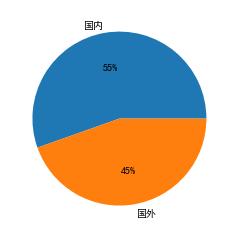

In [56]:
if __name__ == '__main__':
    labels='国内','国外'
    fracs=[276,222]
    plt.pie(x=fracs,labels=labels,autopct='%.0f%%')
    plt.show()

In [57]:
#对数值型变量最大最小规范化
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
book[num_x] = sc.fit_transform(book[num_x])

C:\Users\m\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [58]:
#对“排名”最大最小规范化
y=book['排名']
yy = y[:,np.newaxis]
yc=sc.fit_transform(yy)
yn=yc[:,0]

C:\Users\m\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# 探究各自变量对排名的影响

In [59]:
#将自变量汇总为DataFrame
xcolumn=num_x+['作者国别','推荐','得奖','系列','赠品']
x = pd.DataFrame( data = np.c_[book[num_x],book[['作者国别','推荐','得奖','系列','赠品']]],columns= xcolumn)

In [60]:
x.head()

,评论数,推荐度,五星评分次数,价格,出版时长,折扣,作者国别,推荐,得奖,系列,赠品
0,0.00739312,1,0.120505,0.0401726,0.00876939,0.616049,0,0,0,1,0
1,0.00333943,1,0.0871816,0.0313745,0.00289101,0.382716,1,0,0,0,0
2,0.023359,1,0.12263,0.0788513,0.00732389,1,1,1,0,0,0
3,0.0140928,0.956522,0.144057,0.0418327,0.0645659,0.588889,1,0,0,0,0
4,0.00312295,1,0.0530815,0.0454847,0.00876939,0.382716,1,0,0,1,0


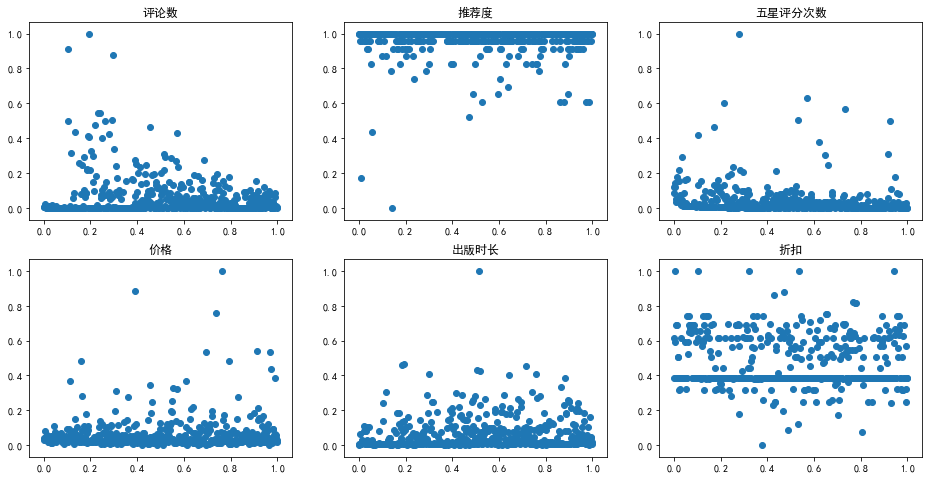

In [61]:
#绘制数值型变量与“排名”的散点图
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    name = num_x
    plt.scatter(x=yc,y=book[num_x[i]]);
    plt.title(name[i])
    plt.savefig("Figbook.png",bbox_inches='tight')

由上述散点图，可以明显看出这11个自变量与“排名”的相关性较小，不适合做回归分析。

# 层次聚类

In [63]:
from scipy.cluster import hierarchy

In [64]:
#先计算距离矩阵，再聚类
dis = hierarchy.distance.pdist(x,'euclidean') 
clust = hierarchy.linkage(dis, method ='ward')

In [65]:
clust

array([[4.07000000e+02, 4.08000000e+02, 4.15507056e-07, 2.00000000e+00],
       [3.98000000e+02, 4.17000000e+02, 1.14276572e-05, 2.00000000e+00],
       [4.98000000e+02, 4.99000000e+02, 4.04295677e-05, 4.00000000e+00],
       ...,
       [9.81000000e+02, 9.88000000e+02, 8.36416661e+00, 1.70000000e+02],
       [9.91000000e+02, 9.92000000e+02, 1.14593141e+01, 2.77000000e+02],
       [9.90000000e+02, 9.93000000e+02, 1.31413371e+01, 4.98000000e+02]])

In [66]:
#查看凝聚式聚类过程结果
pd.DataFrame(data=clust,columns=['c1','c2','distance','counts']).head()

,c1,c2,distance,counts
0,407.0,408.0,4.155071e-07,2.0
1,398.0,417.0,1.142766e-05,2.0
2,498.0,499.0,4.042957e-05,4.0
3,376.0,458.0,1.257598e-04,2.0
4,158.0,161.0,1.375900e-04,2.0


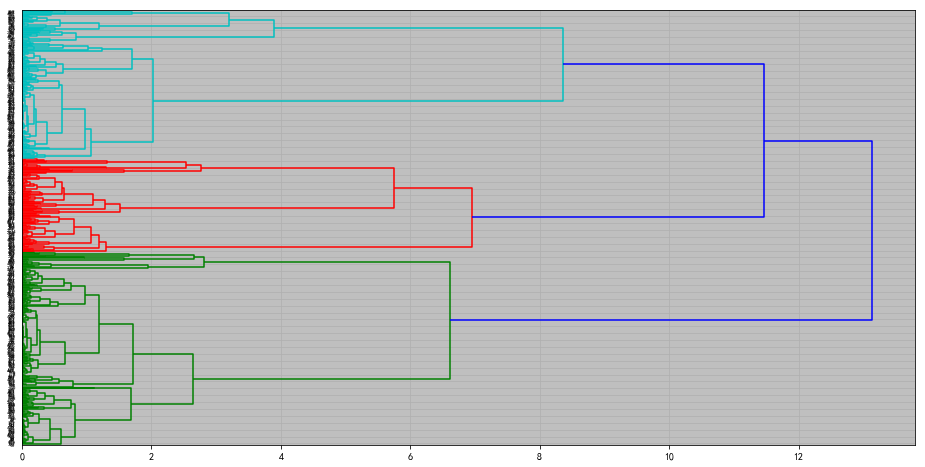

In [67]:
#画聚类层次图
plt.figure(figsize=(16,8))
p = hierarchy.dendrogram(clust,orientation='right',labels = x.index) #orientation树根方向
plt.grid()

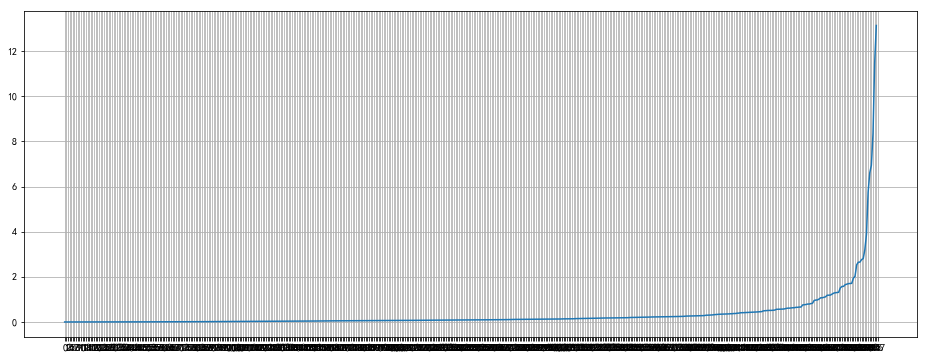

In [68]:
#聚类的类间距
plt.figure(figsize=(16,6))
plt.plot(clust[:,2])    
plt.xticks(range(0,498)) #规定x轴刻度
plt.grid()

In [69]:
#确定最佳类数
label = hierarchy.cut_tree(clust,n_clusters=4)

In [70]:
#做出带有聚类类别的数据集
x_label= pd.Series(label.ravel(),name='label',index=x.index)
data_label = pd.concat([x,x_label],axis=1)

In [71]:
data_label['label'].value_counts()

1    221
3    134
0    107
2     36
Name: label, dtype: int64

# k均值聚类

In [73]:
from sklearn import cluster 
k=4
kmeans = cluster.KMeans(n_clusters=k,init='k-means++',copy_x=True)
kmeans.fit(x)
label_k = kmeans.labels_ #获取各观测聚类标签
centroids = pd.DataFrame(kmeans.cluster_centers_ , columns=x.columns)          #获取聚类中心,并转化为Dataframe
centroids

,评论数,推荐度,五星评分次数,价格,出版时长,折扣,作者国别,推荐,得奖,系列,赠品
0,0.070807,0.980528,0.040334,0.044640,0.066771,0.461925,-1.110223e-16,0.122699,0.036810,0.000000e+00,0.036810
1,0.046584,0.954983,0.026681,0.040010,0.057064,0.486999,1.000000e+00,0.061947,0.013274,-2.775558e-17,0.039823
2,0.071873,0.951363,0.055135,0.160803,0.085144,0.423227,0.000000e+00,0.067797,0.101695,1.000000e+00,0.050847
3,0.070722,0.964348,0.082514,0.124509,0.083930,0.454148,1.000000e+00,0.040000,0.060000,1.000000e+00,0.040000


In [74]:
import seaborn as sns

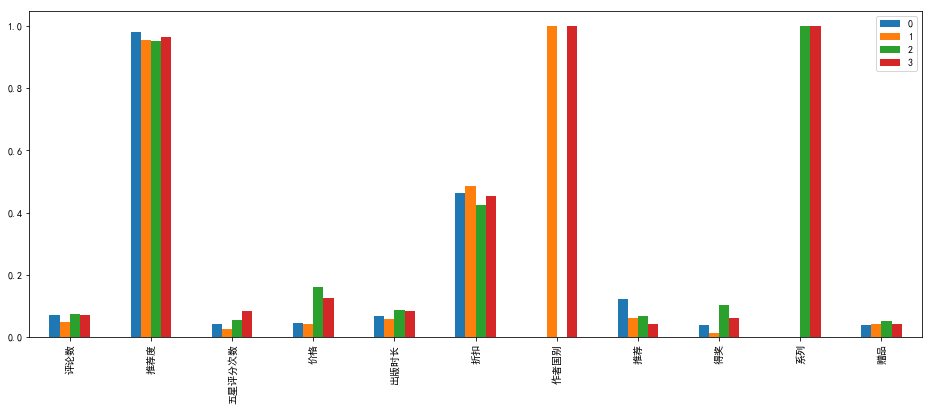

In [75]:
#以直方图显示各类质心的各属性值
centroids[x.columns].T.plot(kind='bar',figsize=(16,6))

In [76]:
for i in data_label.columns:
    data_label[i]=data_label[i].astype(float)

C:\Users\m\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


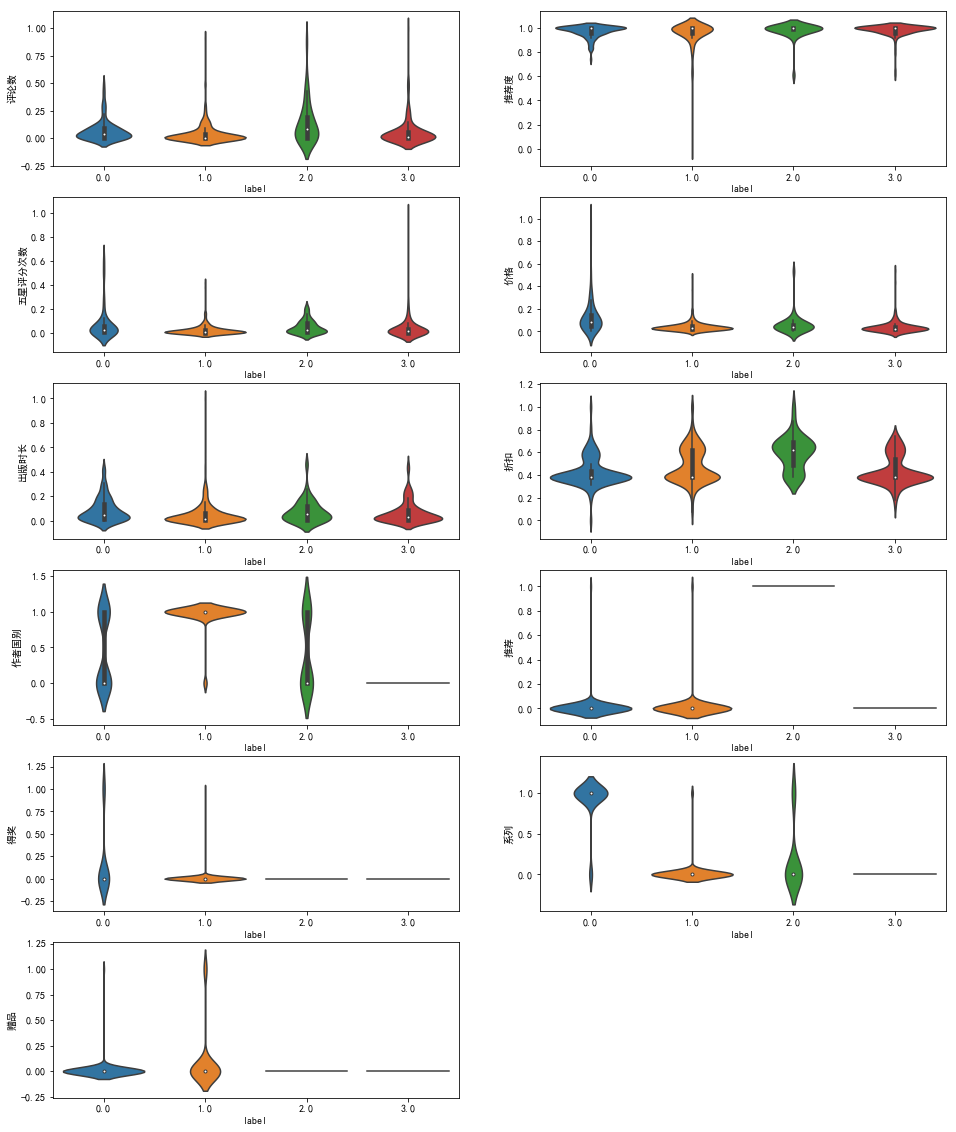

In [77]:
#以小提琴图查看各变量各类上的分布
plt.figure(figsize=(16,20))
for i,c in enumerate(x.columns):
    plt.subplot(6,2,i+1)
    sns.violinplot(x='label',y=c,data=data_label);

### 获取聚类结果的评估指标

In [87]:
from sklearn.metrics import silhouette_score,calinski_harabaz_score

In [88]:
#计算轮廓系数（0，1）之间有效，比较同一数据集的不同聚类结果时，该值越大越好（相同聚类数），随着聚类个数增加，该值逐渐增大
lkxsh = silhouette_score(x, label, metric='euclidean')         #层次聚类结果
lkxsh

C:\Users\m\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5224311303794152

In [89]:
#calinski_harabaz index 等于平均类间离差和 除以  平均类内离差平方和
#该指标越大，聚类质量越好
ljlnbk = calinski_harabaz_score(data_label, label) 
ljlnbh = calinski_harabaz_score(x, label) 
ljlnbk,ljlnbh

C:\Users\m\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1001.158731295056, 237.54885357902864)

# 各类书籍的主要特征

“作者国别”，“推荐”，“得奖”，“系列”，“赠品”五个变量对区分不同组有重要作用

第0类：作者国别较均衡，推荐较少，得奖较少，系列套书较多，赠品较少；
第1类：国内作者较多，推荐较少，得奖较少，系列套书较少，赠品较少；
第2类：作者国别较均衡，全部受推荐，未得奖，系列套书较少，无赠品；
第3类：全部为国外作者，未受推荐，未得奖，无系列套书，无赠品。